In [1]:
# Import modules
import logging
#!pip install wikipedia-api
import wikipediaapi
import databasesaver as dbs
import requests
import pandas as pd
import os
import re

notebook_path = os.getcwd()
print(notebook_path)

/Anton1G3/Study/ds23_f-rdjupad_python/lektion_5


# Explode styles and insribers

In [2]:
df = pd.read_csv('Uppland.csv')
#df.loc[1080]
# convert to w2v+explode
# X, y train -> predict
#df["Inscriber"] = df["Inscriber"].fillna(0)
df.loc[df['Longitude'] >= 19, 'Longitude'] = 18
df.loc[df['Latitude'] <= 55, 'Latitude'] = 56
df.loc[df['Longitude'] <= 11, 'Longitude'] = 13

df["Inscriber"] = df["Inscriber"].str.split(r"\s*,\s*", regex=True)
x = df.explode("Inscriber")
df["Stil"] = df["Stil"].str.split(r"\s*,\s*", regex=True)
y = df.explode("Stil")
df_out = (
    pd.concat(
             [df.set_index("signum"), pd.crosstab(x["signum"], x["Inscriber"]), pd.crosstab(y["signum"], y["Stil"])], axis=1
    )
    .reset_index()
    .drop(columns=["Inscriber","Stil"])
)

#result = df[df['Period_end'] - df['Period_begin'] < 31]


#mask = df['Inscriber'].str.contains(r'Tidkume', na=False) #Öpir
#result = df[mask]

df_out = df_out.fillna(0)
df_out

,signum,revisionID,translitterering,normalisering,translation,Latitude,Longitude,Material,Period_begin,Period_end,...,Östen 2,þuliR,Fp,KB,RAK,pr1,pr2,pr3,pr4,pr5
0,Brostenen,54953925,kinluk × hulmkis × tutiʀ × systiʀ × sukruþaʀ ×...,"Ginnlaug, Holmgæiʀs dottiʀ, systiʀ Sygrøðaʀ ok...","Ginnlög, Holmgers dotter, syster till Sygröd o...",59.508240,17.627210,runsten,793,1066,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,Bökstastenen,51724326,· inki-... [a]uk : iuker [:] þau : litu : rais...,Ingi... ok Iogærðr þau letu ræisa stæin þenna ...,Inge-... och Jogard de läto resa denna sten ef...,59.768910,17.412310,runsten,1000,1066,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Folsbergastenen,52768827,+ akyti lit + rita + st-n + þino + yfti + tumo...,Aguti let retta st[æi]n þenna æftiR Tuma/Tumma...,Agute lät resa denna sten efter Tumme [sin fad...,59.560560,17.175380,0,793,1066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Gliastenen,55417455,× k[a]mal ak × þialfi × þiʀ × litu × risa × s(...,Gamall ok Þialfi þæiʀ letu ræisa stæin þennsa ...,Gammal och Tjälve de läto resa denna sten (eft...,59.346380,17.951990,Runsten,793,1066,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"Granbyhällen, Husby",55339835,ikilauh × lit + hakua · eli þsa · eftʀ + sun s...,Ingilaug let haggva hælli þessa æftiʀ sun sinn...,Ingelög lät hugga denna häll efter sin son Sig...,59.404570,17.927230,runhäll,1000,1099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,Södermanlands runinskrifter Sb1965;12,55455260,: ormr : auk : faskr : auk : þora :· litu : ra...,Ormʀ ok Fastgæiʀʀ/Fastgærðr/Fauskʀ ok Þora let...,Orm och Fastgeirr/Fastgerðr/Fauskr och Tora lä...,59.425730,16.339030,0,793,1066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,Södermanlands runinskrifter SB1965;19,20074180,ku...---- ...--... kuna + l-...u + hakua + sta...,... ... Gunna le[t]u haggva stæin þenna ok bro...,Gu...(och) Gunna läto hugga denna sten och (gö...,56.000000,13.000000,0,0,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,Runmarsvreten,55883165,ku...---- ...--... kuna + l-...u + hakua + sta...,... ... Gunna le[t]u haggva stæin þenna ok bro...,Gu...(och) Gunna läto hugga denna sten och (gö...,59.150450,18.179880,runhäll,793,1066,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1411,Södermanlands runinskrifter SB1965;20,20074175,-(u)--... -u(k) ... ...--t----(a)...- (f)(þ)(u...,... ok() ... ... faður() Guð hialpi and han[s]...,...och()...fader() Gud hjälpe hans ande.,56.000000,13.000000,0,0,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# cut runic text i words
#! pip install text-preprocessing
from text_preprocessing import preprocess_text
df_out['translitterering'] = df_out['translitterering'].str.replace('(','')
df_out['translitterering'] = df_out['translitterering'].str.replace(')','')
df_out['translitterering'] = df_out['translitterering'].str.replace('[','')
df_out['translitterering'] = df_out['translitterering'].str.replace(']','')
df_out['translitterering'] = df_out['translitterering'].str.replace('...','')
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*×\s*",' ', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*\+\s*",' ', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*:\s*",' ', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*\|\s*",' ', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*·\s*",' ', regex=True)
#df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*-\s*",'', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*\.\s*",' ', regex=True)
#df_out['translitterering'] = df_out['translitterering'].str.replace(r"\s*,\s*",' ', regex=True)
df_out['translitterering'] = df_out['translitterering'].str.split()

[nltk_data] Downloading package omw-1.4 to /Users/angr/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
# get Word2Vec model
#! pip install gensim
from gensim.models import Word2Vec
Word2Vec_model = Word2Vec(df_out['translitterering'], seed=0, workers=4, sg=0)

In [5]:
# one can really have fun with Word2Vec
print(Word2Vec_model.wv.most_similar(positive=['stain'], topn=10))
Word2Vec_model.wv['stain']


[('auk', 0.9995598196983337), ('at', 0.9994414448738098), ('sin', 0.9993997812271118), ('stan', 0.9993939995765686), ('stin', 0.9993836879730225), ('bru', 0.9993816614151001), ('a', 0.9993793368339539), ('sun', 0.9993706941604614), ('litu', 0.9993685483932495), ('til', 0.9993651509284973)]


array([ 0.01777048, -0.2663258 , -0.08850657, -0.21156931,  0.3107939 ,
        0.17151207, -0.07560526, -0.46269372,  0.14711604,  0.15908192,
        0.22800867,  0.00301661,  0.27782336,  0.40926263,  0.23630734,
        0.03280863,  0.09002124, -0.2586201 , -0.24972142,  0.24430792,
        0.01264661,  0.38662857, -0.11416192, -0.32276472,  0.31626904,
        0.30841398, -0.00100591,  0.22510967, -0.02849729, -0.0778752 ,
        0.17409338, -0.05941216,  0.14761172, -0.0240569 , -0.4192681 ,
       -0.02819869,  0.1379173 , -0.18220577, -0.02153602,  0.23999825,
       -0.13338608, -0.43330505, -0.08119602, -0.03451075, -0.14765868,
       -0.2423139 , -0.23650697,  0.02037756, -0.12068798,  0.07042699,
       -0.29769936,  0.0902213 , -0.19191448,  0.5635058 ,  0.04245413,
       -0.5383281 , -0.05279508,  0.24867894, -0.13461572,  0.21510406,
        0.05051799,  0.33151212,  0.05581358, -0.31782115,  0.66468465,
       -0.08502503, -0.22077087,  0.08042037,  0.13813588,  0.08

In [6]:
Word2Vec_model = Word2Vec.load("word2vec.model")
print(Word2Vec_model.wv.most_similar(positive=['stain'], topn=10))
Word2Vec_model.wv['stain']


[('auk', 0.9995585083961487), ('at', 0.9994363784790039), ('sin', 0.9993960857391357), ('stin', 0.9993941187858582), ('bru', 0.9993917346000671), ('stan', 0.9993906617164612), ('litu', 0.9993825554847717), ('a', 0.9993726015090942), ('sun', 0.9993721842765808), ('til', 0.9993554949760437)]


array([ 0.04138811, -0.21391557, -0.02111843, -0.3143679 ,  0.2787874 ,
        0.07077538, -0.12365589, -0.48742977,  0.10130572,  0.1880094 ,
        0.2405688 ,  0.10236811,  0.25534266,  0.4280772 ,  0.31930357,
       -0.0089304 ,  0.02272191, -0.3031695 , -0.31360686,  0.20200346,
        0.0031526 ,  0.37713996, -0.03469337, -0.3363603 ,  0.25294045,
        0.23694251,  0.11561681,  0.13001245, -0.01674494, -0.10666823,
        0.17235565, -0.08809467,  0.14213423, -0.00658507, -0.43731752,
       -0.04672825,  0.09348158, -0.17608614, -0.00113934,  0.26653934,
       -0.03452369, -0.3974576 , -0.12508468, -0.06816301, -0.21105656,
       -0.18912204, -0.2474511 ,  0.04166899, -0.16986448,  0.17722233,
       -0.24612933,  0.0591435 , -0.20149206,  0.60305077,  0.03879384,
       -0.36921036, -0.10691167,  0.18350992, -0.11931608,  0.21193273,
       -0.02150366,  0.39401188, -0.06437674, -0.3128894 ,  0.6233673 ,
       -0.04372983, -0.21970865,  0.12050993,  0.15459123,  0.11

In [7]:
print(Word2Vec_model.wv.most_similar(positive=['tiþkumi'], topn=10))

[('s', 0.9975915551185608), ('r', 0.997582197189331), ('i', 0.9974456429481506), ('faþur', 0.9974361658096313), ('sun', 0.9974326491355896), ('uarþ', 0.9974210858345032), ('sina', 0.9974120259284973), ('bru', 0.9974056482315063), ('stn', 0.9973903298377991), ('salu', 0.9973865151405334)]


In [8]:

# we have vectorzed words, now we need to vectorize sentences

import numpy as np
# Creating empty dataframe to hold sentences
W2Vec_data=pd.DataFrame()
    
# Looping through each row for the data
#count = 0
for sentence in df_out['translitterering']:
    #count = count + 1
    #if count > 4 : break
    #print(sentence)
# initiating a sentence with all zeros
    vec_sentence = np.zeros(100)

# Looping thru each word in the sentence and if its present in 
# the Word2Vec model then storing its vector
    for word in sentence:
        #print(word)
        if word in Word2Vec_model.wv.key_to_index.keys() :
            vec_sentence=vec_sentence+Word2Vec_model.wv[word]
        # Appending the sentence to the dataframe
    W2Vec_data=pd.concat([W2Vec_data,pd.DataFrame([vec_sentence])],ignore_index=True)
#return(W2Vec_Data)

In [9]:
W2Vec_data = W2Vec_data*10

In [10]:
#create train data

df_ML = pd.concat([W2Vec_data, df_out], axis=1)
df_ML = df_ML.drop(columns=["signum","revisionID","translitterering","normalisering","translation","Material","edition"])
X = df_ML[df_ML['Period_end'] - df_ML['Period_begin'] < 31]
y = (np.array(X['Period_end']) + np.array(X['Period_begin']))/2


begin_period = [1043 - 8.5, (1097 + 1108)/2 - 5, 1085 - 14, 1050 - 5, 1066 - 9.5, 1085 - 5]
end_period = [1043 + 8.5, (1097 + 1108)/2 + 5, 1085 + 14, 1050 + 5, 1066 + 9.5, 1085 + 5]

count = 0
for insk in ["Upplands runinskrifter 35", "Upplands runinskrifter 209", "Orkestastenen", "Upplands runinskrifter 644", "Upplands runinskrifter 11", "Upplands runinskrifter 229"] :
    X = pd.concat([X,df_ML.loc[df_out['signum'] == insk]],ignore_index=True)
    X.at[len(X)-1, 'Period_begin'] = begin_period[count]
    X.at[len(X)-1, 'Period_end'] = end_period[count]
    y = np.append( y, (begin_period[count] + end_period[count])/2 )
    count = count + 1
        #if df.loc[df['signum'] == inskrift, 'revisionID'].item() < page_data['parse']['revid']:
X = X.fillna(0)


In [11]:
# train the model
from sklearn.neighbors import KNeighborsRegressor
X.columns = X.columns.astype(str)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)


KNeighborsRegressor()

In [33]:
import pickle 
     
# load the model from disk
neigh = pickle.load(open('KNeighborsRegressor_pickle_file', 'rb'))
#result = neigh.predict(X_test) 

In [31]:
# test on iscribers like Tidkume (person, see pdf) and Öpir (verksamhet)
df = pd.read_csv('Uppland.csv')
#df.loc[1080]
# convert to w2v+explode
# X, y train -> predict
#df["Inscriber"] = df["Inscriber"].fillna(0)
df.loc[df['Longitude'] >= 19, 'Longitude'] = 18
df.loc[df['Latitude'] <= 55, 'Latitude'] = 56
df.loc[df['Longitude'] <= 11, 'Longitude'] = 13

count = 0
mask = df['Inscriber'].str.contains('Tidkume', na=False, regex=False) #Öpir Tidkume
#print(df[mask])

#X_pred = df_ML["Öpir" in df["Inscriber"]]
X_pred = df_ML[mask]
X_pred = X_pred.fillna(0)
X_pred.columns = X_pred.columns.astype(str)
y_pred = neigh.predict(X_pred)
print(y_pred)
#coordinates are available in 
df[mask]
#[1048.6 1023.5 1023.5 1023.5 1019.  1022.  1023.5 1023.5 1029.5 1014.5 1026.5 1023.5 1019.  1023.5 1029.5]

[1050.2 1032.6 1032.  1029.  1029.  1032.5 1032.5 1026.  1029.  1035.
 1032.  1019.  1035.  1032.  1032.  1029.  1032.5 1032.  1041.1 1035. ]


,signum,revisionID,translitterering,normalisering,translation,Latitude,Longitude,Stil,Inscriber,Material,Period_begin,Period_end,edition
606,Upplands runinskrifter 691,54589581,birn : lit : risa : s--- ...- : iftiʀ : sterbi...,Biorn let ræisa s[tæin þennsa] æftiʀ Styrbiorn...,"Björn lät resa (denna sten) efter Styrbjörn, s...",59.49639,17.12510,NaN,"Ödbjörn enligt Erik Brate,Brate, ej troligt, ...",NaN,1035,1065,0
621,Upplands runinskrifter 716,54542996,· bruni : lit : resa : auk : ari stin : þina :...,Bruni let ræisa ok Ari()/Arnvi() stæin þenna æ...,Brune lät resa och Are() denna sten efter Gudf...,59.56626,17.24156,NaN,"Ödbjörn enligt Erik Brate,Brate. Osannolikt e...",NaN,793,1066,0
622,Upplands runinskrifter 718,54593741,[...asr : auk : olifʀ : auk : uar:asi : li-......,... ok Olæifʀ ok Var-Asi()/Varr-Asi() le[tu] ....,... och Olev och '''uarasi''' läto ... denna s...,59.55498,17.14018,NaN,"Tidkume , osäker bedömning",NaN,793,1066,0
635,Upplands runinskrifter 733,54537884,[(þ)(i)(l)stan : lit : ris... ... ...n : sun :...,"Þorstæinn() let ræis[a] ... ..., sun sinn goða...","Torsten() lät resa ..., sin gode son. Tidkume ...",59.59654,17.30669,NaN,Tidkume,NaN,793,1066,0
644,Upplands runinskrifter 742,54631331,+ ari + lit × ʀftia × usyrk · faþur + sin + --...,"Ari let æftiʀ Osyrg, faður sinn. [Tið]kumi ris...","Are lät (resa stenen) efter Osyrg, sin fader ....",59.60033,17.12405,NaN,"Tidkume , Livsten",NaN,793,1066,0
657,Upplands runinskrifter 758,51521048,ikib(i)rn : ak : þiʀ : bryþr : litu : risa : s...,Ingibiorn ok þæiʀ brøðr letu ræisa stæin þenna...,Ingebjörn och bröderna med honom läto resa den...,59.63749,17.08005,pr4,Tidkume,NaN,793,1066,0
658,Upplands runinskrifter 759,51514457,birynhiifʀ : ak : hrifnkʀ : ak : sik:ualti : u...,Bryniulfʀ() ok Hræfningʀ() ok Sigvaldi letu ræ...,Brynjulv och Rävning () och Sigvalde läto resa...,59.63898,17.08096,pr4,Tidkume,NaN,793,1066,0
661,Upplands runinskrifter 763,54686058,bruni : ak : hulm:stin : litu : risa : istin :...,Bruni ok Holmstæinn letu ræisa stæin þennsa æf...,Brune och Holmsten läto resa stenen efter Gunn...,59.61380,17.10020,NaN,Samma ristare som gjort Upplands runinskrifter...,NaN,793,1066,0
662,Upplands runinskrifter 764,54688368,brunk : ak : hulm:stin : litu : risa : istin :...,Bruni ok Holmstæinn letu ræisa stæin þennsa æf...,Brune och Holmsten läto resa denna sten efter ...,59.61386,17.10017,NaN,"Samma som gjort Upplands runinskrifter 763,U 7...",NaN,793,1066,0
663,Upplands runinskrifter 765,54688642,-...k...-...-n : h...sl-...- : a-s : -...,... ... ... ...,NaN,59.61276,17.09235,NaN,Tidkume,NaN,793,1066,0


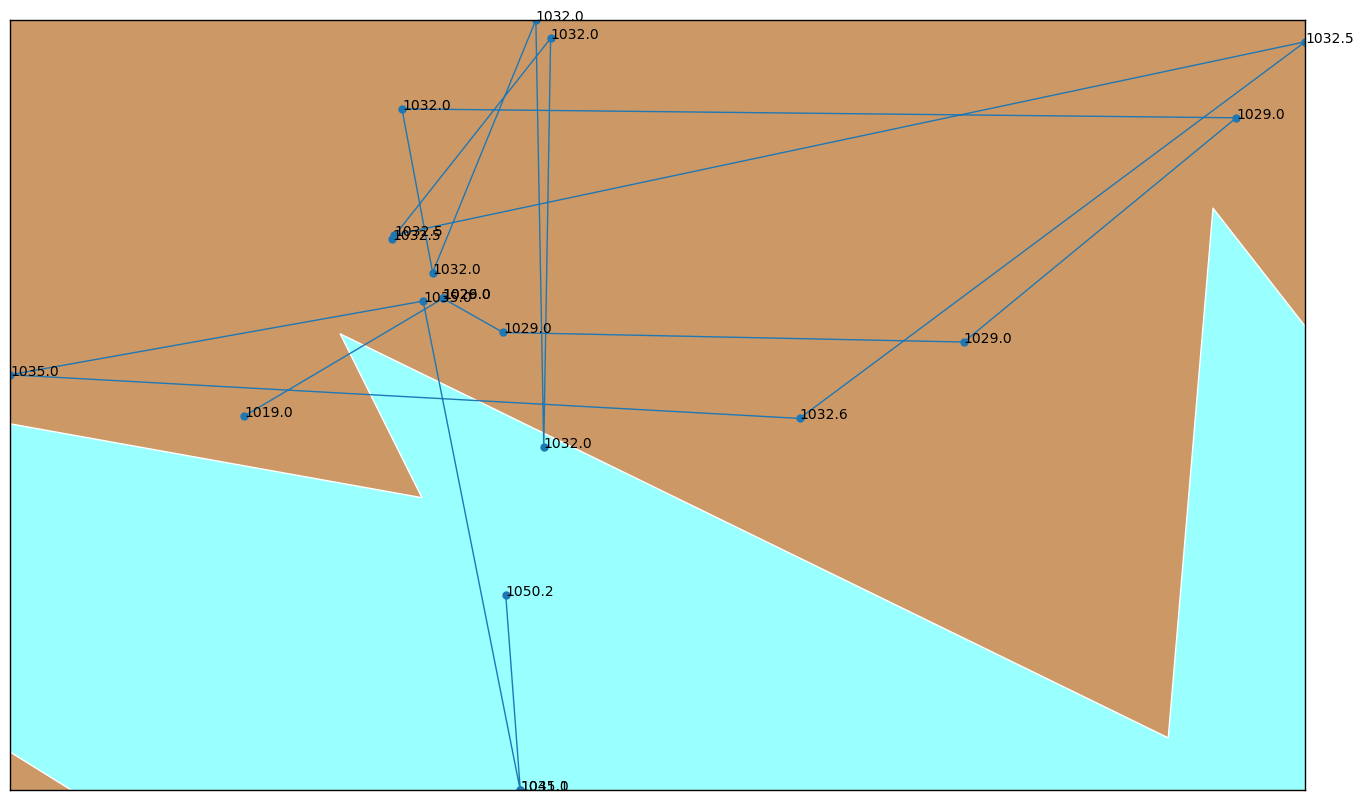

,Latitude,Longitude,0,signum
11,59.56718,17.02141,1019.0,Upplands runinskrifter 775
7,59.61380,17.10020,1026.0,Upplands runinskrifter 763
8,59.61386,17.10017,1029.0,Upplands runinskrifter 764
4,59.60033,17.12405,1029.0,Upplands runinskrifter 742
3,59.59654,17.30669,1029.0,Upplands runinskrifter 733
15,59.68542,17.41468,1029.0,Upplands runinskrifter 813
10,59.68896,17.08397,1032.0,Upplands runinskrifter 771
17,59.62408,17.09613,1032.0,Upplands runinskrifter ATA6243/65
14,59.72419,17.13704,1032.0,Upplands runinskrifter 803
2,59.55498,17.14018,1032.0,Upplands runinskrifter 718


In [13]:
#! pip install basemap
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
#from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt


track = df.loc[mask,['Latitude','Longitude']].reset_index(drop=True)
track = pd.concat([track, pd.DataFrame(y_pred)],axis=1)
track = pd.concat([track, df.loc[mask,['signum']].reset_index(drop=True)],axis=1)
track = track.sort_values(by=[0,'Longitude','Latitude'])

lat = []
lon = []
year = []
signum_text = []
for index, coord in track.iterrows():
    lat.append(coord['Latitude'])
    lon.append(coord['Longitude'])
    year.append(coord[0])
    signum_text.append(coord['signum'])
    
plt.figure(figsize=(20,10))
#m=Basemap(llcrnrlon=17,llcrnrlat=59,urcrnrlon=18,urcrnrlat=60,resolution='l') 
m=Basemap(llcrnrlon=np.min(lon) ,llcrnrlat=np.min(lat) ,urcrnrlon=np.max(lon) ,urcrnrlat=np.max(lat) ,resolution='l') 
m.drawcoastlines(color='white')
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
#plt.title('')

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=5, linewidth=1) 
count = 0
for y_year in year:
    #plt.text(x[count],y[count],str(y_year) + ' ' + signum_text[count])
    plt.text(x[count],y[count],str(y_year))
    count = count + 1
plt.show()
track

[1032.5 1035.  1051.1 1026.  1025.1 1034.1 1032.  1026.  1019.  1051.1
 1051.1 1047.9 1035.6 1041.1 1019.  1026.  1019.  1032.  1032.6 1032.5
 1035.6 1032.5 1032.  1032.  1058.6 1032.6 1054.  1032.  1101.5 1032.
 1035.  1032.5 1032.6 1032.5 1019.  1019.  1051.1 1019.  1032.6 1029.
 1034.1 1029.  1041.1 1034.1 1041.1 1019.  1032.6 1051.1 1035.6 1026.
 1051.1 1041.1 1046.5 1019.  1032.5 1051.1 1032.  1032.5 1050.2 1032.5
 1026.  1058.6 1041.1 1029.  1026.  1034.1 1019.  1032.  1026.  1032.5
 1032.  1053.5 1032.5 1034.1 1032.6 1034.1 1034.1 1051.1 1035.  1043.5
 1032.5 1049.7]


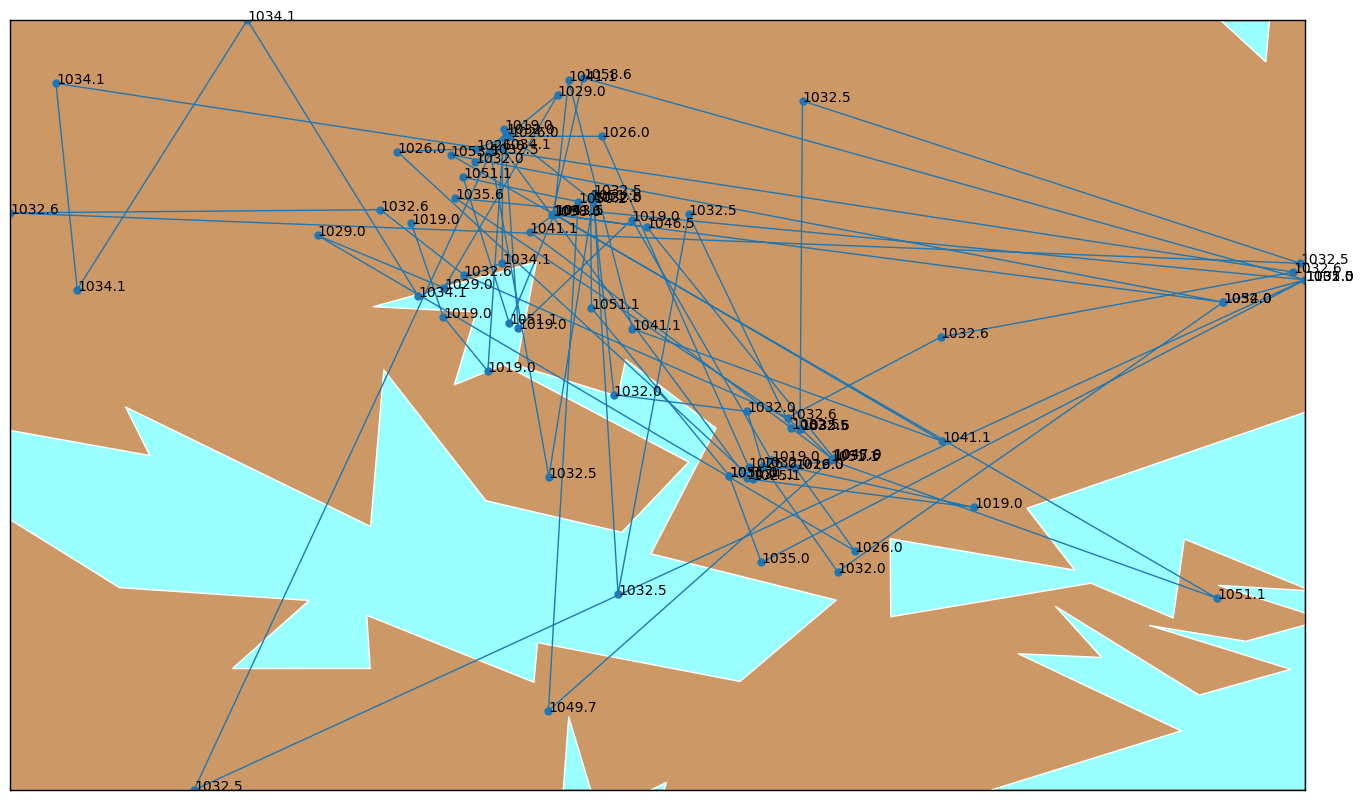

,signum,revisionID,translitterering,normalisering,translation,Latitude,Longitude,Stil,Inscriber,Material,Period_begin,Period_end,edition
37,Upplands runinskrifter 36,54553146,inkimoþ ' lit ' raisa ' staina ' uk ' bro ' ef...,"Ingimoð let ræisa stæina ok bro æftiʀ Karl, bo...",Ingemod lät resa stenarna och [göra] bron efte...,59.349080,17.719400,NaN,Öpir 1,NaN,793,1066,0
64,Upplands runinskrifter 67,54302040,... · sihatr : litu · r(a)... ...,... Sighvatr letu ræ[isa] ...,... Sigvat läto resa ...,59.391510,17.911530,NaN,Öpir 1 [för få runor för attr. enl. Åhlén 1997],NaN,793,1066,0
96,Upplands runinskrifter 104,50460688,' þorstin ' lit × kera ' merki ' ftiʀ ' suin '...,"Þorstæinn let gæra mærki æftiʀ Svæin, faður si...","Torsten lät göra minnesmärket efter Sven, sin ...",59.507861,17.868389,NaN,Öpir,NaN,1000,1099,0
107,Upplands runinskrifter 115,51177732,§A ... finuiþr · sun · rahnfriþ · lit ... §B ....,"§A ... Finnviðr, sunn ʀagnfriðaʀ, let ... §B ....","... Finnvid, Ragnfrids son, lät ... ......",59.519380,17.894440,NaN,"Öpir 1 [svagt grundad attr., Åhlén 1997]",NaN,793,1066,0
109,Upplands runinskrifter 117,54220577,þorfastr ' uk · ikiluk ' litu ' raisa ' stain ...,Þorfastr ok Ingilaug letu ræisa stæin æftiʀ Gæ...,Torfast och Ingelög lät resa stenen efter Gerb...,59.502700,17.899990,NaN,Öpir 1,NaN,793,1066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Upplands runinskrifter Fv1948;168,51184398,sibi ' uk ' ikriþ ' litu ' raisa ' stain ' ift...,Sibbi ok Ingrið letu ræisa stæin æftiʀ G[a]ga(...,Sibbe och Ingrid lät resa stenen efter Gagi ()...,59.732658,17.683749,NaN,Öpir,NaN,1050,1099,0
1020,Upplands runinskrifter Fv1967;262B,55308575,ku-...,...,NaN,59.507570,17.868520,NaN,Öpir 1 osäker bedömning eller Öpirs stil,NaN,793,1066,0
1045,Upplands runinskrifter Fv1976;107,51184431,...-arn · uk · brantr litu · risa · stin · at ...,...[bi]orn() ok Brandr letu ræisa stæin at Kar...,... björn () och Brand läto resa stenen efter ...,59.858100,17.635000,NaN,Öpir,NaN,1000,1099,0
1164,Södermanlands runinskrifter 7,49712225,· suainalti : auk : suainunkʀ : auk : asi : au...,Svæinaldi ok Svæinungʀ ok Æsi/Gasi ok Gas þau ...,"Svenalde och Svenung och Äse och Gas, de läto ...",59.086560,17.151150,"pr2,pr3",Öpir 2,runsten,793,1066,0


In [14]:
# test on iscribers like Tidkume (person, see pdf) and Öpir (verksamhet)
count = 0
mask = df['Inscriber'].str.contains('Öpir', na=False, regex=False) #Öpir Tidkume
#mask1 = df['Inscriber'].str.contains('ej Öpir', na=False, regex=False) #Öpir Tidkume
#mask = mask and ~mask1
#print(df[mask])

#X_pred = df_ML["Öpir" in df["Inscriber"]]
X_pred = df_ML[mask]
X_pred = X_pred.fillna(0)
X_pred.columns = X_pred.columns.astype(str)
y_pred = neigh.predict(X_pred)
print(y_pred)
#coordinates are available in 
#df[mask]

track = df.loc[mask,['Latitude','Longitude']].reset_index(drop=True)
track = pd.concat([track, pd.DataFrame(y_pred)],axis=1)
track = pd.concat([track, df.loc[mask,['signum']].reset_index(drop=True)],axis=1)
track = track.sort_values(by=[0,'Longitude','Latitude'])

lat = []
lon = []
year = []
signum_text = []
for index, coord in track.iterrows():
    lat.append(coord['Latitude'])
    lon.append(coord['Longitude'])
    year.append(coord[0])
    signum_text.append(coord['signum'])

plt.figure(figsize=(20,10))
m=Basemap(llcrnrlon=np.min(lon) ,llcrnrlat=np.min(lat) ,urcrnrlon=np.max(lon) ,urcrnrlat=np.max(lat) ,resolution='l') 
m.drawcoastlines(color='white')
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
#plt.title('')

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=5, linewidth=1) 
count = 0
for y_year in year:
    #plt.text(x[count],y[count],str(y_year) + ' ' + signum_text[count])
    plt.text(x[count],y[count],str(y_year))
    count = count + 1
plt.show()
df[mask]

In [15]:
track

,Latitude,Longitude,0,signum
45,59.847080,17.442060,1019.0,Upplands runinskrifter 906
37,59.721050,17.485020,1019.0,Upplands runinskrifter 827
34,59.647910,17.544880,1019.0,Upplands runinskrifter 669
66,59.972040,17.566520,1019.0,Upplands runinskrifter 1085
35,59.706080,17.585650,1019.0,Upplands runinskrifter 684
...,...,...,...,...
71,59.937920,17.495180,1053.5,Upplands runinskrifter 1106
26,59.740400,18.530100,1054.0,Upplands runinskrifter 541
24,59.857670,17.631440,1058.6,Upplands runinskrifter 489
61,60.040839,17.672758,1058.6,Upplands runinskrifter 1034


[1029.  1026.  1047.9 1034.1 1034.1 1032.  1032.6 1032.6 1032.5 1029.
 1034.1 1026.  1032.  1032.  1034.1 1026.  1019.  1019.  1026.  1019.
 1034.1 1034.1 1019.  1059.5 1026.  1041.1 1032.  1029.  1047.9 1032.6
 1019.  1054.4 1051.1 1032.6 1019.  1058.6 1046.7 1051.1 1034.1 1034.1
 1026.  1032.6 1032.5 1026.  1051.1 1059.5 1058.6 1032.  1025.1 1029.
 1054. ]


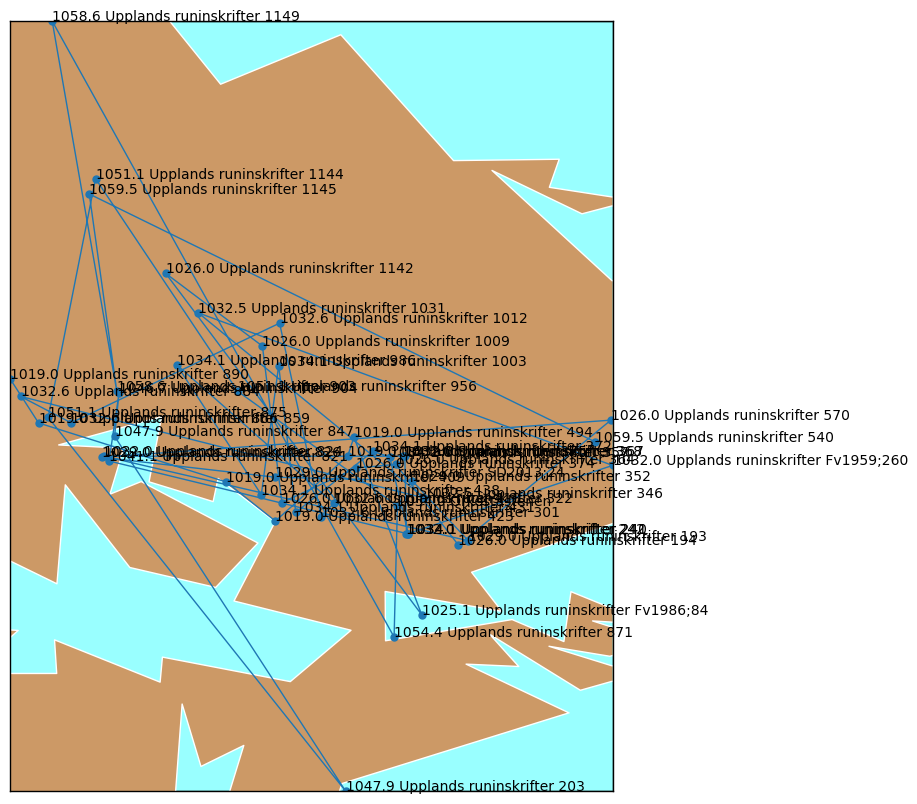

,signum,revisionID,translitterering,normalisering,translation,Latitude,Longitude,Stil,Inscriber,Material,Period_begin,Period_end,edition
174,Upplands runinskrifter 193,54438682,kuno auk inkialtr iluhi þoh litu ritu rita sti...,"Gunna ok Ingialdr, Illugi, þau letu rettu rett...","Gunna och Ingjald [och] Illuge, de läto uppres...",59.530840,18.260890,NaN,"Åsmund Kåresson, Torfast",NaN,793,1066,0
175,Upplands runinskrifter 194,49992277,al&#124;/al&#124;i&#124; &#124;li/&#124;l&#124...,Al/Ali/Alli let ræisa stæin þenna æftiʀ sik si...,Alle lät resa denna sten efter sig själv. Han ...,59.521653,18.239664,pr3,"Åsmund Kåresson,Åsmund och Frögärd",runsten,793,1066,0
181,Upplands runinskrifter 203,52582566,ali lit -... ...-(i)n þino ' aftiʀ ' ulf sun s...,"Ali/Alli let [ræisa st]æin þenna æftiʀ Ulf, su...","Alle lät resa denna sten efter Ulv, sin son, f...",59.000000,18.000000,NaN,Åsmund Kåresson,NaN,1000,1099,0
206,Upplands runinskrifter 240,55193506,tan auk hus(k)arl + auk suain + auk hulmfriþr ...,"Dan ok Huskarl ok Svæinn ok Holmfriðr, þaun mø...","Dan och Huskarl och Sven och Holmfrid, moder o...",59.545070,18.133310,NaN,Åsmund Kåresson,NaN,793,1066,0
207,Upplands runinskrifter 241,55193508,n tan auk huskarl ' auk sua(i)n ' l(i)tu rita ...,En Dan ok Huskarl ok Svæinn letu retta stæin æ...,Och Dan och Huskarl och Sven läto resa stenen ...,59.545330,18.133350,NaN,Åsmund Kåresson,NaN,793,1066,0
208,Upplands runinskrifter 242,54429136,...- × auk × st[u]... ... ...- × (r)(a)(i)(s)(...,... ok ... ... ... ræisa ...,... och St- ... (lät)o resa ...,59.544980,18.129340,NaN,Åsmund Kåresson,NaN,793,1066,0
256,Upplands runinskrifter 301,54251252,§P [· nsmar × li- (r)ita · stin þi]no a... [.....,§P Asmarr() le[t] retta stæin þenna æ[ftiʀ] .....,Åsmar lät resa denna sten ... Guds moder. Åsmu...,59.581160,17.948810,NaN,Åsmund Kåresson,NaN,793,1066,0
277,Upplands runinskrifter 322,52312739,§P þiuþburh ' ulit rita stin ' þina ibtiʀ [+ n...,§P Þiuðborg let retta stæin þenna æftiʀ '''''n...,Tjudborg lät uppresa denna sten efter . . . hj...,59.610550,17.974780,NaN,"Åsmund Kåresson,Åsmund , mycket ovisst",NaN,793,1066,0
297,Upplands runinskrifter 346,54510109,[rahnfriþr · lit rt stain þino ' aftiʀ biurno ...,"ʀagnfriðr let retta stæin þenna æftiʀ Biorn, s...","Ragnfrid lät uppresa denna sten efter Björn, h...",59.621570,18.167390,NaN,Åsmund Kåresson,NaN,793,1066,0
303,Upplands runinskrifter 352,54291619,× sihlauh × lit × stain[a r](i)ta × iftiʀ sihu...,"Siglaug let stæina retta æftiʀ Sigvið, sun sinn.","Siglög lät uppresa stenen efter Sigvid, sin son.",59.658430,18.141250,NaN,"Åsmund Kåresson L, Torsten,Torsten [Källström...",NaN,793,1066,0


In [20]:
# test on iscribers like Tidkume (person, see pdf) and Öpir (verksamhet)
df = pd.read_csv('Uppland.csv')
#df.loc[1080]
# convert to w2v+explode
# X, y train -> predict
#df["Inscriber"] = df["Inscriber"].fillna(0)
df.loc[df['Longitude'] >= 19, 'Longitude'] = 18
df.loc[df['Latitude'] <= 55, 'Latitude'] = 56
df.loc[df['Longitude'] <= 11, 'Longitude'] = 13


count = 0
mask = df['Inscriber'].str.contains('Åsmund Kåresson', na=False, regex=False) #Öpir Tidkume
#mask1 = df['Inscriber'].str.contains('ej Öpir', na=False, regex=False) #Öpir Tidkume
#mask = mask and ~mask1
#print(df[mask])

#X_pred = df_ML["Öpir" in df["Inscriber"]]
X_pred = df_ML[mask]
X_pred = X_pred.fillna(0)
X_pred.columns = X_pred.columns.astype(str)
y_pred = neigh.predict(X_pred)
print(y_pred)
#coordinates are available in 
#df[mask]

track = df.loc[mask,['Latitude','Longitude']].reset_index(drop=True)
track = pd.concat([track, pd.DataFrame(y_pred)],axis=1)
track = pd.concat([track, df.loc[mask,['signum']].reset_index(drop=True)],axis=1)
track = track.sort_values(by=[0,'Longitude','Latitude'])

lat = []
lon = []
year = []
signum_text = []
for index, coord in track.iterrows():
    lat.append(coord['Latitude'])
    lon.append(coord['Longitude'])
    year.append(coord[0])
    signum_text.append(coord['signum'])

plt.figure(figsize=(20,10))
m=Basemap(llcrnrlon=np.min(lon) ,llcrnrlat=np.min(lat) ,urcrnrlon=np.max(lon) ,urcrnrlat=np.max(lat) ,resolution='l') 
m.drawcoastlines(color='white')
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
#plt.title('')

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=5, linewidth=1) 
count = 0
for y_year in year:
    plt.text(x[count],y[count],str(y_year) + ' ' + signum_text[count])
    #plt.text(x[count],y[count],str(y_year))
    count = count + 1
plt.show()
df[mask]

In [18]:
track

,Latitude,Longitude,0,signum
34,59.874910,17.288110,1019.0,Upplands runinskrifter 890
30,59.780850,17.348790,1019.0,Upplands runinskrifter 866
17,59.655530,17.746950,1019.0,Upplands runinskrifter 409
19,59.572680,17.851170,1019.0,Upplands runinskrifter 423
16,59.710860,18.004650,1019.0,Upplands runinskrifter 375
22,59.750710,18.017810,1019.0,Upplands runinskrifter 494
48,59.373790,18.161740,1025.1,Upplands runinskrifter Fv1986;84
43,60.098250,17.618410,1026.0,Upplands runinskrifter 1142
40,59.943900,17.823670,1026.0,Upplands runinskrifter 1009
18,59.612020,17.865030,1026.0,Upplands runinskrifter 418


In [21]:
# tegn stenar från Vg correspond to Olof Skötkonung late ruling dates https://sv.wikipedia.org/wiki/Olof_Sk%C3%B6tkonung
mask = df['translitterering'].str.contains('þikn', na=False, regex=False) #Öpir Tidkume þegn þikn
#print(df[mask])
X_pred = df_ML[mask]
X_pred = X_pred.fillna(0)
X_pred.columns = X_pred.columns.astype(str)
print(neigh.predict(X_pred)) 

[1041.1 1029.  1026.  1032.  1026.  1026.  1029.  1026.  1026.  1019. ]


In [23]:
# Ingvars sten is right after Ingvars tåget
mask = df['translitterering'].str.contains('ikuars', na=False, regex=False) #Öpir Tidkume þegn þikn
#print(df[mask])

X_pred = df_ML[mask]
X_pred = X_pred.fillna(0)
X_pred.columns = X_pred.columns.astype(str)
print(neigh.predict(X_pred)) 

[1058.6]


In [40]:
df[mask]
X_pred

,0,1,2,3,4,5,6,7,8,9,...,Östen 2,þuliR,Fp,KB,RAK,pr1,pr2,pr3,pr4,pr5
674,0.837201,-3.649044,-0.424835,-5.322698,4.738164,1.124167,-2.074769,-8.489754,1.918841,3.168263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fp  mean =  1029.9620000000002  var = 54.721555999999865
KB  mean =  1027.825  var = 23.314374999999824
RAK  mean =  1031.4121212121213  var = 45.6713682277317
pr1  mean =  1029.976923076923  var = 55.90177514792874
pr2  mean =  1029.569230769231  var = 55.22571992110448
pr3  mean =  1032.1458333333333  var = 156.7749826388888
pr4  mean =  1031.8000000000002  var = 104.25298701298681
pr5  mean =  1033.05  var = 96.80249999999934


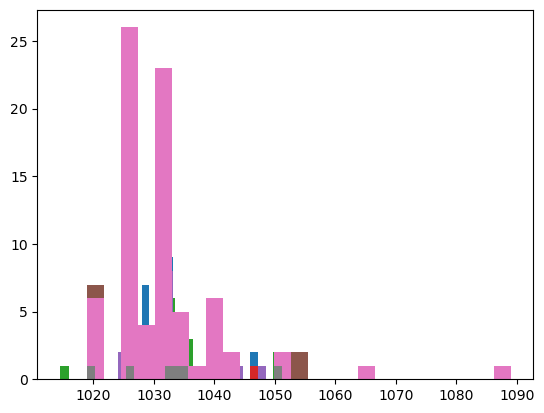

In [30]:
fig, ax=plt.subplots()

for ristnings_stil in ['Fp','KB','RAK','pr1','pr2','pr3','pr4','pr5']:
    mask = df_ML[ristnings_stil] == 1 #Öpir Tidkume
#mask1 = df['Inscriber'].str.contains('ej Öpir', na=False, regex=False) #Öpir Tidkume
#mask = mask and ~mask1
#print(df[mask])
#X_pred = df_ML["Öpir" in df["Inscriber"]]
    X_pred = df_ML[mask]
    X_pred = X_pred.fillna(0)
    X_pred.columns = X_pred.columns.astype(str)
    y_pred = neigh.predict(X_pred)
    ax.hist(y_pred,25)
    print(ristnings_stil, ' mean = ',np.mean(y_pred),' var =',  np.var(y_pred))
#print(y_pred)